In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option('display.max_rows', None)

### Importing datasets

In [19]:
data=pd.read_csv('datasets/2015-01-01 to 2021-05-13.csv')
df=data.copy()
df.Date=pd.to_datetime(df.Date)
df_kbl=df[df['Stock Symbol']=='KBL']
df_kbl=df_kbl.reset_index()
df_kbl=df_kbl.set_index('Date')

### A Popular Strategy Using Autocorrelation
One puzzling anomaly with stocks is that investors tend to overreact to news. Following large jumps, either up or down, stock prices tend to reverse. This is described as mean reversion in stock prices: prices tend to bounce back, or revert, towards previous levels after large moves, which are observed over time horizons of about a week. A more mathematical way to describe mean reversion is to say that stock returns are negatively autocorrelated.

## Taking weekly data of KBL and calculating autocorelation  percentage change with 1 lag

In [20]:
df_kbl_weekly = df_kbl.resample(rule='W').last()

returns=df_kbl_weekly['Closing Price'].pct_change()

autocorrelation=returns.autocorr()

print("The autocorrelation of weekly returns is %4.2f" %(autocorrelation))

The autocorrelation of weekly returns is -0.05


Notice that the autocorrelation of returns for KBL is negative but it is very close to zero, so we  cannot say the stock is 'mean reverting'


## Taking Monthly data of KBL and calculating autocorelation  difference change with 1 lag

In [21]:
df_kbl_monthly = df_kbl.resample(rule='M').last()

returns=df_kbl_weekly['Closing Price'].diff()

returns=returns.dropna()

autocorrelation=returns.autocorr(lag=1)

print("The autocorrelation of weekly returns is %4.2f" %(autocorrelation))

The autocorrelation of weekly returns is -0.06


## ACF(AUTO CORELATION FUNCTION) FOR KBL RETURN

The autocorrelation of weekly KBL returns is -0.05
The approximate confidence interval is +/- 0.11


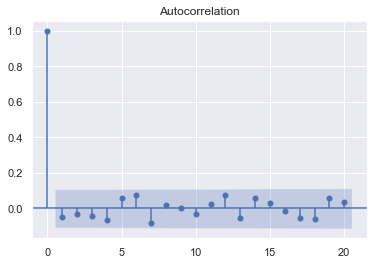

In [23]:
# Import the acf module and the plot_acf module from statsmodels
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from math import sqrt

df_kbl_weekly = df_kbl.resample(rule='W').last()
returns=df_kbl_weekly['Closing Price'].pct_change()
returns=returns.dropna()


# Compute and print the autocorrelation of MSFT weekly returns
autocorrelation = returns.autocorr()
print("The autocorrelation of weekly KBL returns is %4.2f" %(autocorrelation))

# Find the number of observations by taking the length of the returns DataFrame
nobs = len(returns)

# Compute the approximate confidence interval
conf = 1.96/sqrt(nobs)
print("The approximate confidence interval is +/- %4.2f" %(conf))

# Plot the autocorrelation function with 95% confidence intervals and 20 lags using plot_acf
plot_acf(returns, alpha=0.05, lags=20)
plt.show()

SO, what can we conclude from this. For making this concept more clear we plot the white noise and see its ACF plot.

### White Noise(Gaussian)

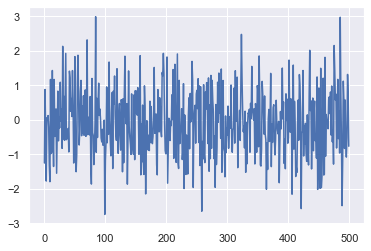

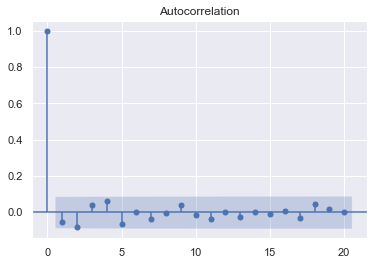

In [7]:
noise=np.random.normal(loc=0,scale=1,size=500)
plt.plot(noise)
plot_acf(noise,alpha=0.05,lags=20)
plt.show()

## If we compare the white noise plot and KBL plot of ACF function, Both are pretty much alike.

## Can't Forecast White Noise
A white noise time series is simply a sequence of uncorrelated random variables that are identically distributed. Stock returns are often modeled as white noise. Unfortunately, for white noise, we cannot forecast future observations based on the past - autocorrelations at all lags are zero.

Notice that for a white noise time series, all the autocorrelations are close to zero, so the past will not help you forecast the future.